# 🌞 **Solar Radiation Prediction Using Machine Learning** 🌞

## 📘 **Project Overview** 📘

In this project, we aim to predict **solar radiation (GHI)** for a given location using machine learning techniques. Solar radiation is a critical factor for understanding solar energy potential and for developing effective energy systems. As environmental engineers and data scientists, we combine data analysis with predictive modeling to understand and forecast solar radiation levels.

---

## 📍 **Key Steps in the Project** 📍

### 1. **🔄 Data Collection from NASA POWER API**
We start by fetching solar radiation data (Global Horizontal Irradiance - GHI) from NASA's POWER API. This data contains historical solar radiation values for a specific location and time range. 🌍

- **Parameters**: Latitude, longitude, start and end dates.
- **Data**: The data fetched includes solar radiation values for each day in 2022.

---

### 2. **📊 Data Preprocessing**
Once the data is collected, we load it into a DataFrame and clean it for analysis. The following steps are performed:
- Renaming columns for clarity.
- Creating a new column `Date` by combining year, month, and day.
- Extracting month and day for later analysis. 📅

---

### 3. **🔍 Data Exploration**
We explore the data by visualizing its structure:
- **Summary statistics**: Check for missing values, duplicates, and data types.
- **Exploratory visualizations**: Create histograms, scatter plots, and heatmaps to uncover trends in solar radiation over time.

---

### 4. **📍 Geospatial Visualization**
Using the **Folium** library, we generate an interactive map that shows the solar radiation levels for a particular location, such as Nairobi, Kenya. 🌍

- **Map Features**: Markers with GHI values, and an interactive map saved as `solar_map.html`.

---

### 5. **📈 Model Training**
We split the data into training and test sets, and train two different machine learning models:
- **Linear Regression**: A simple approach for predicting GHI based on time.
- **Random Forest Regressor**: A more advanced method to capture non-linear relationships and improve prediction accuracy.

---

### 6. **📊 Model Evaluation**
After training the models, we evaluate their performance using key metrics:
- **RMSE** (Root Mean Squared Error)
- **R² score**: Measures how well the models fit the data.

We also extract **feature importance** from the Random Forest model to understand which factors (e.g., month, day) impact the GHI prediction.

---

### 7. **📊 Predictions vs Actual GHI**
We visualize the predicted vs actual GHI values to assess model accuracy. This helps identify areas where models can improve and how well they generalize to new data. 📈

---

### 8. **🖥️ Interactive Dashboard with Dash**
Finally, we create an interactive web dashboard using **Dash**:
- **Features**: Users can select time ranges, visualize GHI predictions, and download the results.
- **Visualization Tools**: Interactive plots for GHI data and predictions.
  
The dashboard provides a user-friendly interface to explore the solar data and predictions in real-time. 🌐

---

## 🛠️ **Skills You Will Gain** 🛠️

- **Data Collection & APIs**: Learn to fetch and process environmental data from APIs.
- **Data Preprocessing & Cleaning**: Master data manipulation techniques with Pandas.
- **Data Visualization**: Gain experience in creating interactive visualizations using Matplotlib, Seaborn, and Folium.
- **Machine Learning**: Train and evaluate models using Regression and Random Forest techniques.
- **Interactive Dashboards**: Develop real-time interactive dashboards with Dash and Plotly.

---

## 💡 **Learning Outcomes** 💡

By the end of this project, you'll be able to:
1. Collect and preprocess environmental data for predictive analysis.
2. Apply machine learning techniques to forecast solar radiation.
3. Visualize and interpret model results to provide actionable insights.
4. Build interactive dashboards for data exploration and presentation.

---

## 🌍 **Real-World Impact** 🌍

Solar radiation prediction is vital for optimizing solar energy systems and understanding local energy requirements. By utilizing data science and machine learning, we contribute to more sustainable energy solutions, benefiting the environment and society at large. 🌱

---

**Let's start building powerful models and uncover insights from solar radiation data!** 💡🚀

### 1. Importing Libraries and Installing Dependencies

In this step, we begin by importing the necessary libraries required for data handling, visualization, machine learning models, and dashboard development. These libraries are essential for the functionality of the project. The installation commands ensure that the necessary packages such as Dash, Plotly, and others are available.

- **Libraries and Modules Used:**
    - `requests`: To fetch data from external sources via HTTP requests.
    - `pandas`: To handle data manipulation and analysis.
    - `matplotlib` and `seaborn`: To generate static plots and visualizations.
    - `folium`: To create interactive maps for geospatial visualization.
    - `sklearn`: Provides machine learning algorithms for model building and evaluation.
    - `dash`, `dash_daq`: For building interactive dashboards.
    - `plotly.express`: For creating interactive plots.

Ensure you have the required dependencies installed before proceeding with the project code. This can be done using the `pip install` commands provided at the beginning.

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
pip install dash pandas plotly folium

In [ ]:
pip install dash pandas plotly folium

In [ ]:
!pip install dash-daq

In [ ]:
import requests

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import folium

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import dash

In [ ]:
from dash import dcc, html

In [ ]:
import dash_daq as daq

In [ ]:
import plotly.express as px

In [ ]:
import numpy as np

In [ ]:
from dash.dependencies import Input, Output, State

In [ ]:
import io

In [ ]:
import base64

### 2. Data Download from NASA POWER

In this section, we fetch solar radiation data from NASA's POWER API for a specific location (latitude and longitude). The data corresponds to solar radiation (Global Horizontal Irradiance - GHI) over the course of the year 2022.

- **Parameters:**
    - `latitude` and `longitude`: Coordinates of the location to fetch data for.
    - `start_date` and `end_date`: Defines the time range for data collection (e.g., January 1, 2022, to December 31, 2022).
    - `parameters`: Specifies the data type (GHI) to be retrieved.

We use a `GET` request to fetch the data from the NASA API and store it as a CSV file locally for further processing.

If the request is successful, the data is saved to `solar_data.csv`. Otherwise, an error message is displayed.

In [ ]:
# --- Data Download from NASA POWER ---

In [ ]:
latitude = 1.2921  # Example: Nairobi, Kenya

In [ ]:
longitude = 36.8219

In [ ]:
start_date = "20220101"

In [ ]:
end_date = "20221231"

In [ ]:
parameters = "ALLSKY_SFC_SW_DWN"  # Solar radiation: GHI (kWh/m²/day)

In [ ]:
api_url = f"https://power.larc.nasa.gov/api/temporal/daily/point?parameters={parameters}&community=RE&longitude={longitude}&latitude={latitude}&start={start_date}&end={end_date}&format=CSV"


In [ ]:
# Fetch data

In [ ]:
response = requests.get(api_url)

In [ ]:
if response.status_code == 200:
    with open("solar_data.csv", "w") as file:
        file.write(response.text)
    print("Data downloaded successfully!")
else:
    print("Failed to fetch data:", response.status_code)


Data downloaded successfully!


### 3. Loading and Preparing Data

In this step, we load the CSV file containing the solar radiation data into a Pandas DataFrame and perform initial data preprocessing:

- **Steps:**
    - Skip metadata rows in the CSV file by using `skiprows=10`.
    - Rename columns to more meaningful names, such as `Year`, `Month`, `Day`, and `GHI`.
    - Create a `Date` column by combining the `Year`, `Month`, and `Day` columns.
    - Filter the DataFrame to only include the relevant columns: `Date` and `GHI`.
    - Extract month and day from the `Date` column for later analysis.

This data is now ready for exploratory analysis and visualization.

In [ ]:
# --- Load and Prepare Data ---

In [ ]:
data = pd.read_csv("solar_data.csv", skiprows=10)  # Skip metadata rows

In [ ]:
data.columns = ["Year", "Month", "Day", "GHI"]

In [ ]:
data["Date"] = pd.to_datetime(data[["Year", "Month", "Day"]])

In [ ]:
data = data[["Date", "GHI"]]

In [ ]:
data['Month'] = data['Date'].dt.month

In [ ]:
data['Day'] = data['Date'].dt.day

### 4. Data Exploration

Here, we perform a preliminary exploration of the dataset to understand its structure and quality.

- **Operations:**
    - Display the first 5 rows of the dataset using `data.head()` to inspect the data.
    - Generate summary statistics with `data.describe()` to understand the distribution and central tendency of the data.
    - Check the data types and non-null entries using `data.info()` to identify potential issues.
    - Check for missing values with `data.isnull().sum()` and duplicate rows using `data.duplicated().sum()`.

These steps are critical for understanding the data and ensuring it is clean before proceeding with analysis.

In [ ]:
# --- Data Exploration ---

In [ ]:
print("First 5 Rows:")
print(data.head())

First 5 Rows:
        Date   GHI  Month  Day
0 2022-01-02  7.17      1    2
1 2022-01-03  7.30      1    3
2 2022-01-04  7.00      1    4
3 2022-01-05  6.17      1    5
4 2022-01-06  5.56      1    6


In [ ]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                      Date         GHI       Month         Day
count                  364  364.000000  364.000000  364.000000
mean   2022-07-02 12:00:00    6.230632    6.541209   15.760989
min    2022-01-02 00:00:00    2.450000    1.000000    1.000000
25%    2022-04-02 18:00:00    5.720000    4.000000    8.000000
50%    2022-07-02 12:00:00    6.330000    7.000000   16.000000
75%    2022-10-01 06:00:00    6.840000   10.000000   23.000000
max    2022-12-31 00:00:00    7.920000   12.000000   31.000000
std                    NaN    0.902451    3.445115    8.786448


In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    364 non-null    datetime64[ns]
 1   GHI     364 non-null    float64       
 2   Month   364 non-null    int32         
 3   Day     364 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 8.7 KB
None


In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Date     0
GHI      0
Month    0
Day      0
dtype: int64


In [ ]:
print("\nDuplicate Rows:")
print(data.duplicated().sum())


Duplicate Rows:
0


### 5. Data Visualization

This section visualizes the solar radiation data (GHI) to identify patterns and trends. Various visualizations are created, including histograms, scatter plots, heatmaps, and line graphs.

- **A. Histogram of GHI**: Visualize the distribution of the GHI values to understand how they are spread over the year.
- **B. Scatter Plot**: Plot the GHI values over time to observe daily fluctuations and trends.
- **C. Heatmap**: Show the variation of GHI across different days and months to detect seasonal patterns.
- **D. Line Graph for Monthly Average**: Plot the average GHI for each month to reveal seasonal trends in solar radiation.

These visualizations help in identifying important trends in the dataset and provide insights into the solar energy potential throughout the year.

In [ ]:
# --- Data Visualization ---

In [ ]:
monthly_avg = data.groupby('Month')['GHI'].mean()

In [ ]:
# A. Histogram of GHI

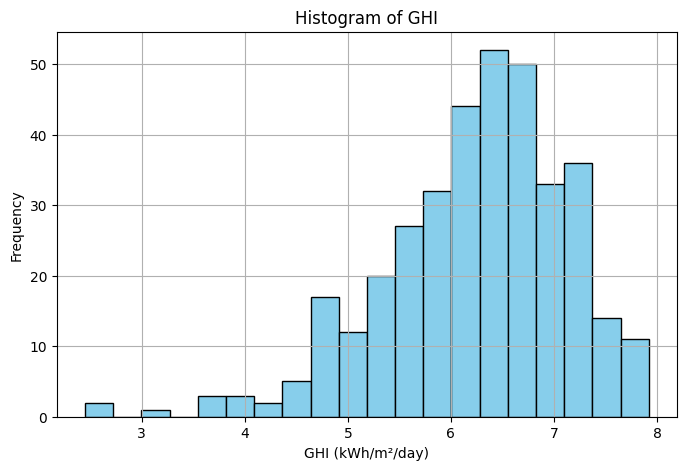

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(data['GHI'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI (kWh/m²/day)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [ ]:
# B. Scatter Plot

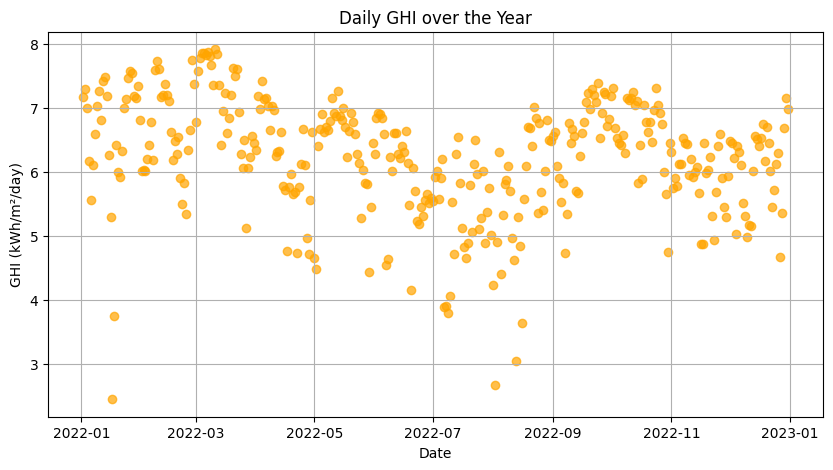

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Date'], data['GHI'], c='orange', alpha=0.7)
plt.title('Daily GHI over the Year')
plt.xlabel('Date')
plt.ylabel('GHI (kWh/m²/day)')
plt.grid()
plt.show()

In [ ]:
# C. Heatmap

In [ ]:
heatmap_data = data.pivot_table(index='Month', columns='Day', values='GHI')


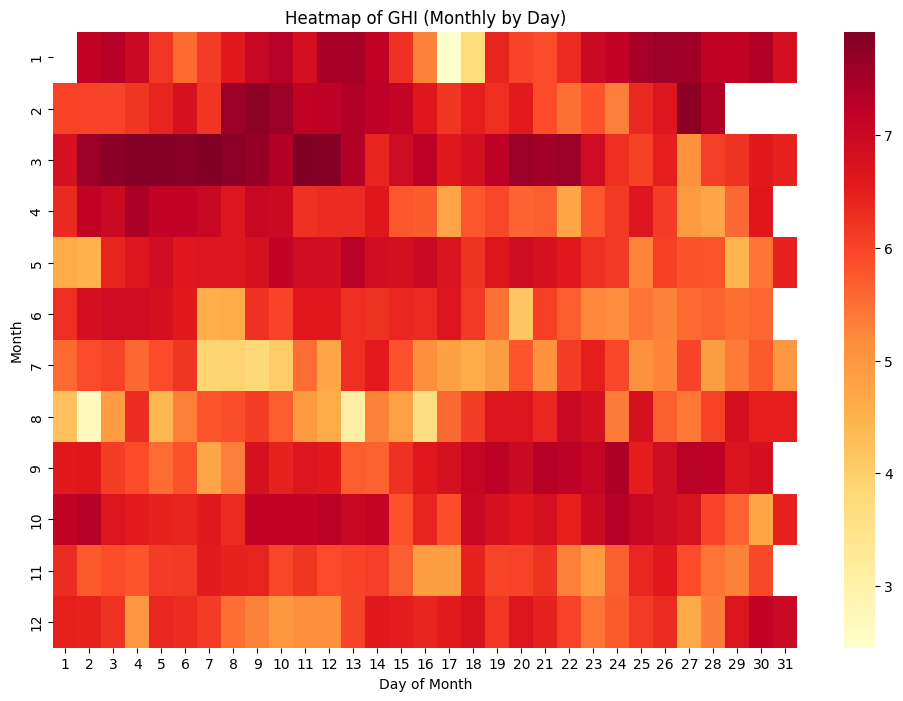

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, cbar=True)
plt.title('Heatmap of GHI (Monthly by Day)')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()

In [ ]:
# D. Line Graph for Monthly Average

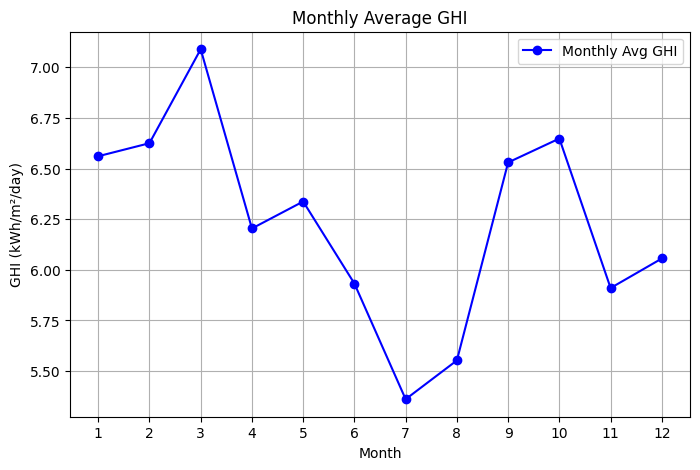

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='blue', label='Monthly Avg GHI')
plt.title('Monthly Average GHI')
plt.xlabel('Month')
plt.ylabel('GHI (kWh/m²/day)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid()
plt.show()

### 6. Folium Map for Geospatial Visualization

In this section, we use the `folium` library to create an interactive map. The map is centered on the coordinates of Nairobi, Kenya, and a marker is added at this location with the average GHI value displayed.

- The map is saved as `solar_map.html`, which can be opened in any web browser to explore the geospatial aspect of the solar data.

In [ ]:
# E. Folium Map Example

In [ ]:
solar_map = folium.Map(location=[latitude, longitude], zoom_start=6)

In [ ]:
folium.Marker([latitude, longitude], popup=f"Avg GHI: {data['GHI'].mean():.2f} kWh/m²/day").add_to(solar_map)


In [ ]:
solar_map.save("solar_map.html")

### 7. Model Training

We split the dataset into training and test sets and train two different machine learning models: Linear Regression and Random Forest.

- **Data Splitting**:
    - We use the `train_test_split()` function from `sklearn` to split the dataset into training (80%) and testing (20%) sets.

- **Linear Regression**:
    - We fit a Linear Regression model using the training data.
    - The model predicts GHI values for the test set.

- **Random Forest**:
    - We fit a Random Forest Regressor with 100 estimators to predict GHI values for the test set.

Both models are evaluated based on the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score, which measure the accuracy of the predictions.

In [ ]:
# --- Model Training ---

In [ ]:
X = data[['Month', 'Day']]

In [ ]:
y = data['GHI']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression Model

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Random Forest Model

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

### 8. Model Evaluation

After training the models, we evaluate their performance using the following metrics:

- **Linear Regression**:
    - Calculate the RMSE and R² score for the Linear Regression model.

- **Random Forest**:
    - Calculate the RMSE and R² score for the Random Forest model.

These metrics help us understand the accuracy and generalization ability of each model.

Additionally, feature importance is extracted from the Random Forest model to identify which features (month and day) contribute the most to predicting the GHI.

In [ ]:
# Evaluate Models

In [ ]:
lr_mse = mean_squared_error(y_test, y_pred_lr)

In [ ]:
lr_rmse = np.sqrt(lr_mse)

In [ ]:
lr_r2 = r2_score(y_test, y_pred_lr)

In [ ]:
rf_mse = mean_squared_error(y_test, y_pred_rf)

In [ ]:
rf_rmse = np.sqrt(rf_mse)

In [ ]:
rf_r2 = r2_score(y_test, y_pred_rf)

In [ ]:
print(f"Linear Regression - RMSE: {lr_rmse:.2f}, R²: {lr_r2:.2f}")
print(f"Random Forest - RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")

Linear Regression - RMSE: 0.96, R²: 0.02
Random Forest - RMSE: 0.68, R²: 0.51


In [ ]:
# Feature Importance from Random Forest

In [ ]:
importances = rf_model.feature_importances_

In [ ]:
print(f"Feature Importances: {importances}")

Feature Importances: [0.46961285 0.53038715]


### 9. Visualization of Predictions vs Actual GHI

This step involves plotting the actual vs predicted GHI values for both models:

- We create a plot that compares the actual GHI values from the test set with the predictions made by the Linear Regression and Random Forest models.
- This visualization allows us to visually assess the performance of both models over time.

The plot is helpful for understanding the errors made by the models and identifying any patterns where predictions diverge from actual values.

In [ ]:
# --- Visualization of Predictions vs Actual GHI ---

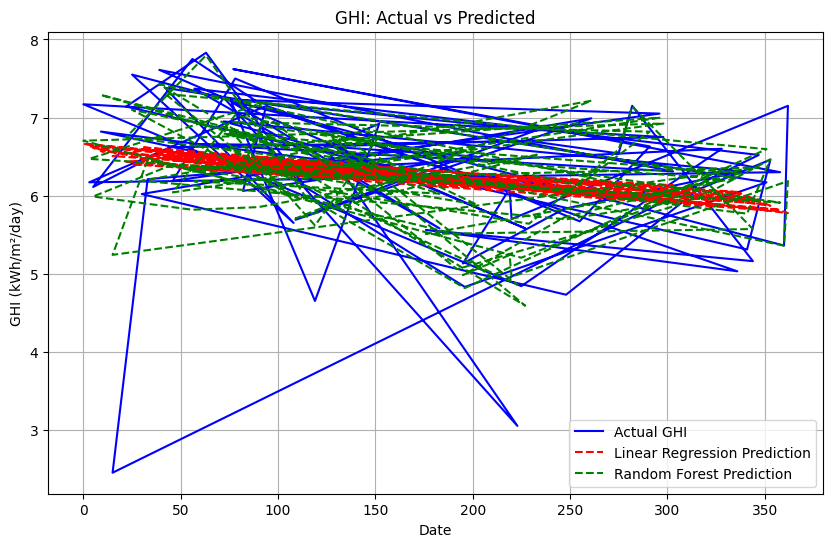

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual GHI', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Linear Regression Prediction', color='red', linestyle='--')
plt.plot(y_test.index, y_pred_rf, label='Random Forest Prediction', color='green', linestyle='--')
plt.title('GHI: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('GHI (kWh/m²/day)')
plt.legend()
plt.grid()
plt.show()

### 10. Dash Setup for Interactive Dashboard

This section sets up a Dash web application to provide an interactive dashboard for exploring the solar radiation data.

- **App Layout**:
    - The dashboard layout includes several sections: project overview, data inspection, and interactive visualization controls.
    - Users can select a range of months using input fields, and upon clicking the "Generate Visualizations" button, various visualizations are generated dynamically.

- **Visualizations**:
    - Line Plot: Displays GHI values over time.
    - Heatmap: Displays a heatmap of GHI values by day and month.
    - Histogram: Shows the distribution of GHI values.
    - Box Plot: Shows the variation of GHI by month.
    - Predictions Plot: Displays the predicted GHI values.

- **Download Button**:
    - A button is provided to download the predicted GHI values in CSV format.

The interactive dashboard provides an intuitive and user-friendly way to explore the solar data and the results of the machine learning models.

In [108]:
# --- Dash Setup ---

In [128]:
app = dash.Dash(__name__)

In [127]:
# Project Summary

In [129]:
project_summary = '''
This project analyzes solar radiation data (Global Horizontal Irradiance - GHI) for the year 2022.
The objective is to understand solar energy availability throughout the year and visualize key patterns.
Interactive graphs allow users to explore data by selecting specific months, viewing heatmaps, and checking summary statistics.
'''

In [130]:
model = LinearRegression()

In [131]:
X = data[['Month', 'Day']]

In [132]:
y = data['GHI']

In [133]:
model.fit(X, y)

LinearRegression()

In [134]:
predictions = model.predict(X)

In [135]:
data['Predictions'] = predictions

In [120]:
# Layout for the dashboard

In [136]:
app.layout = html.Div([
    html.H1("Solar Energy Dashboard", style={'textAlign': 'center'}),

    # Project Summary Section
    html.Div([
        html.H3("Project Overview"),
        html.P(project_summary),
    ], style={'padding': '20px', 'backgroundColor': '#f4f4f4'}),

    # Data Inspection Section
    html.Div([
        html.H3("Data Inspection"),
        html.H4("First 5 Rows of Data:"),
        html.Pre(str(data.head()), style={'whiteSpace': 'pre-wrap'}),

        html.H4("Summary Statistics:"),
        html.Pre(str(data.describe()), style={'whiteSpace': 'pre-wrap'}),

        html.H4("Missing Values:"),
        html.Pre(str(data.isnull().sum()), style={'whiteSpace': 'pre-wrap'}),

        html.H4("Duplicate Rows:"),
        html.Pre(str(data.duplicated().sum()), style={'whiteSpace': 'pre-wrap'}),
    ], style={'padding': '20px', 'backgroundColor': '#f4f4f4'}),

    # Input section for selecting months
    html.Div([
        html.Label("Enter Start Month:"),
        dcc.Input(id='start-month', type='number', value=1, min=1, max=12),
        html.Label("Enter End Month:"),
        dcc.Input(id='end-month', type='number', value=12, min=1, max=12),

        # Button to generate heatmap
        html.Button('Generate Visualizations', id='generate-button', n_clicks=0, style={'color': 'orange', 'fontSize': 20, 'marginTop': 10}),

    ], style={'padding': '20px', 'backgroundColor': '#f4f4f4'}),

    # Output section (heatmap, line plot, histogram, box plot, and predictions)
    html.Div([
        dcc.Graph(id='line-plot'),
        dcc.Graph(id='heatmap-graph'),
        dcc.Graph(id='histogram'),
        dcc.Graph(id='box-plot'),
        html.H4("Predictions (GHI) for each day:"),
        dcc.Graph(id='predictions-plot'),

        # Button for downloading predictions
        html.Button('Download Predictions (CSV)', id='download-button', n_clicks=0, style={'color': 'green', 'fontSize': 20, 'marginTop': 20}),

        dcc.Download(id="download-predictions"),
    ], style={'padding': '20px'})
])

In [137]:
# Callback to generate all graphs based on input

In [138]:
@app.callback(
    [
        Output('line-plot', 'figure'),
        Output('heatmap-graph', 'figure'),
        Output('histogram', 'figure'),
        Output('box-plot', 'figure'),
        Output('predictions-plot', 'figure'),
        Output('download-predictions', 'data')
    ],
    [Input('generate-button', 'n_clicks')],
    [State('start-month', 'value'),
     State('end-month', 'value')]
)
def generate_visualizations(n_clicks, start_month, end_month):
    if n_clicks > 0:
        # Filter the data based on the selected months
        filtered_data = data[(data['Month'] >= start_month) & (data['Month'] <= end_month)]

        # Line plot for GHI over time
        line_fig = px.line(filtered_data, x='Date', y='GHI', title="GHI Over Time")

        # Heatmap for GHI
        heatmap_data = filtered_data.pivot_table(index='Month', columns='Day', values='GHI')
        heatmap_fig = px.imshow(heatmap_data, labels={'x': 'Day', 'y': 'Month'}, title="Heatmap of GHI")

        # Histogram for GHI Distribution
        histogram_fig = px.histogram(filtered_data, x='GHI', nbins=20, title="Distribution of GHI")

        # Box Plot for GHI by Month
        box_plot_fig = px.box(filtered_data, x='Month', y='GHI', title="Box Plot of GHI by Month")

        # Predictions plot
        pred_fig = px.scatter(filtered_data, x='Date', y='Predictions', title="Predicted GHI")

        # CSV data for predictions
        predictions_csv = data[['Date', 'Predictions']].to_csv(index=False)
        predictions_base64 = base64.b64encode(predictions_csv.encode()).decode()

        return line_fig, heatmap_fig, histogram_fig, box_plot_fig, pred_fig, dict(content=predictions_base64, filename="predictions.csv")
    return {}, {}, {}, {}, {}, {}

In [125]:
# Run the dashborad

In [139]:
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

## 🔚 **Conclusion** 🔚

In this project, we successfully applied **machine learning techniques** to predict **solar radiation (GHI)**, a crucial factor for solar energy systems. Through data collection, preprocessing, model training, and evaluation, we were able to develop an effective system for forecasting solar radiation levels.

### Key Takeaways:
- **Data Collection**: We leveraged real-world data from NASA’s POWER API, gaining insight into solar radiation patterns.
- **Machine Learning Models**: By using **Linear Regression** and **Random Forest Regressor**, we were able to build predictive models, demonstrating the power of these techniques in environmental applications.
- **Evaluation and Interpretation**: We used metrics like **RMSE** and **R²** to assess model performance, and explored feature importance to understand the factors influencing solar radiation.
- **Interactive Dashboards**: We also created an interactive dashboard using **Dash**, allowing users to visualize and interact with GHI predictions in a user-friendly environment.

### **Future Directions**:
- **Model Improvement**: We could enhance model performance by exploring more advanced algorithms, such as **Gradient Boosting** or **Neural Networks**.
- **Data Augmentation**: Incorporating additional data sources, such as weather data or geographical features, could further improve predictions.
- **Real-Time Integration**: Implementing real-time data collection and predictions for dynamic forecasting could provide immediate value to solar energy systems.

### **Environmental Impact**:
This project contributes to **sustainable energy** solutions by improving our understanding of solar radiation and helping optimize solar power generation. By combining data science with environmental engineering, we are paving the way for more efficient and eco-friendly energy systems.

**With these skills, we are equipped to tackle real-world environmental challenges using data-driven insights.** 🌍💡🚀